In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_table("drugs_prop.txt", sep = ",")
df.columns = df.columns.str.strip()

df

,mass,logp,h_d,h_a,rot_b,tpsa,target
0,602.68,7.33,2,6,11,105.59,antiinfective
1,686.88,5.24,3,10,6,140.98,antiinfective
2,416.47,3.60,1,7,4,75.61,antineoplastic
3,390.52,3.32,1,5,3,80.67,cns
4,222.25,-0.86,2,6,2,115.04,cns
...,...,...,...,...,...,...,...
5528,411.54,3.16,2,5,4,62.16,cns
5529,627.64,1.55,5,13,7,204.30,antineoplastic
5530,645.68,-1.11,4,13,9,220.26,antiinfective
5531,481.53,1.65,2,8,5,128.03,antiinfective


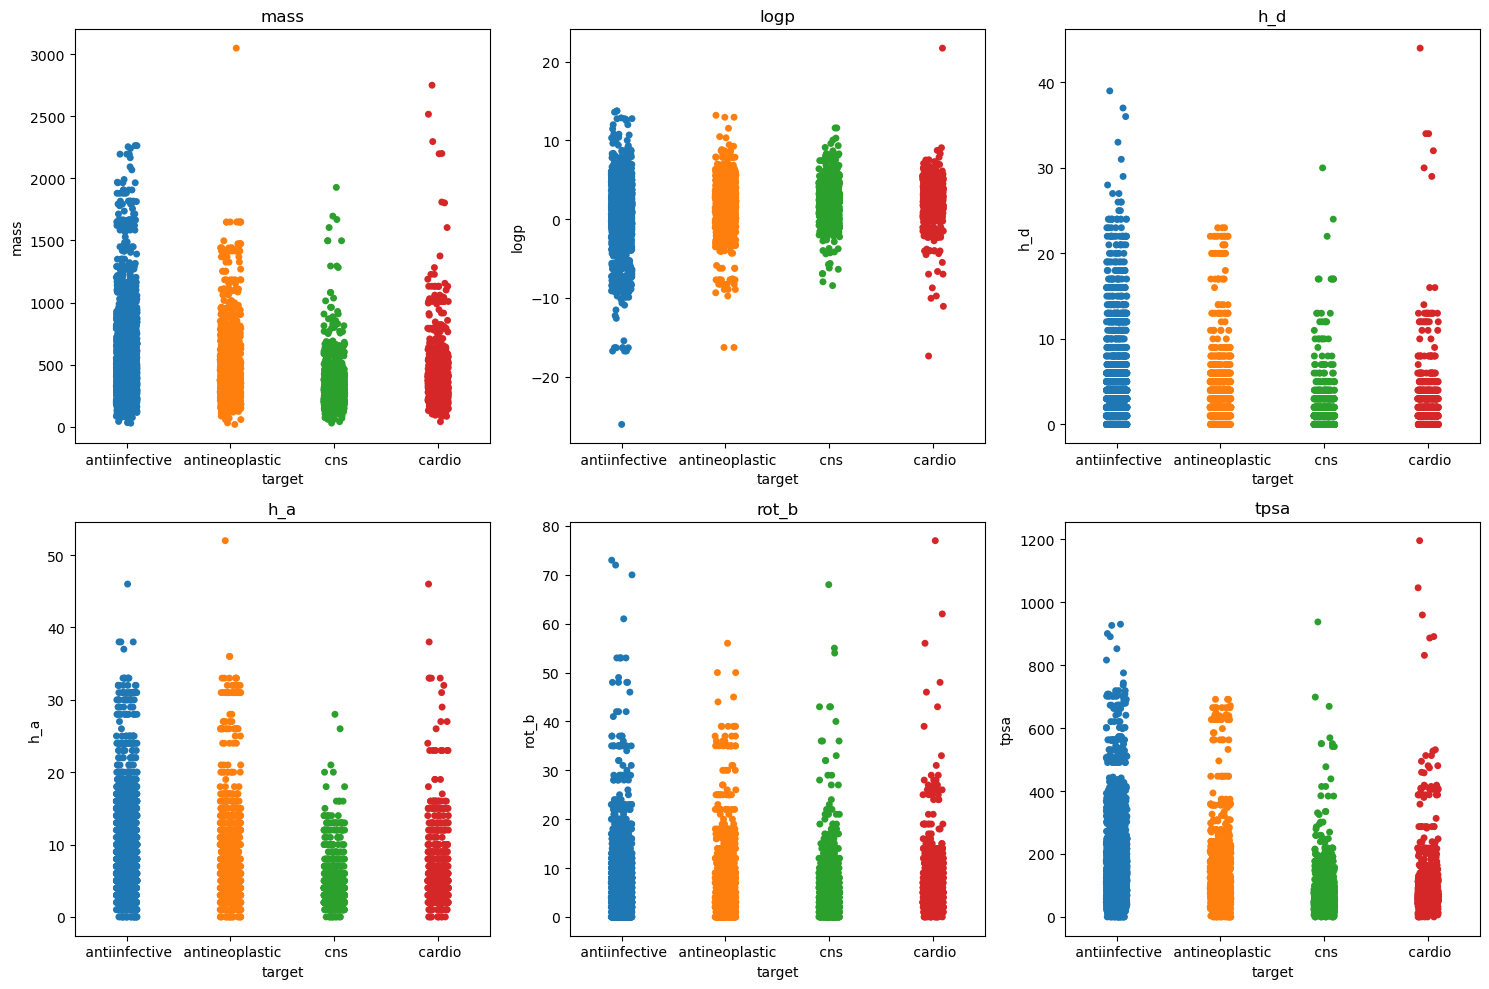

In [5]:
features = ["mass", "logp", "h_d", "h_a", "rot_b", "tpsa"]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.stripplot(x="target", y=feature, data=df, hue="target", legend=False)
    plt.title(feature)
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

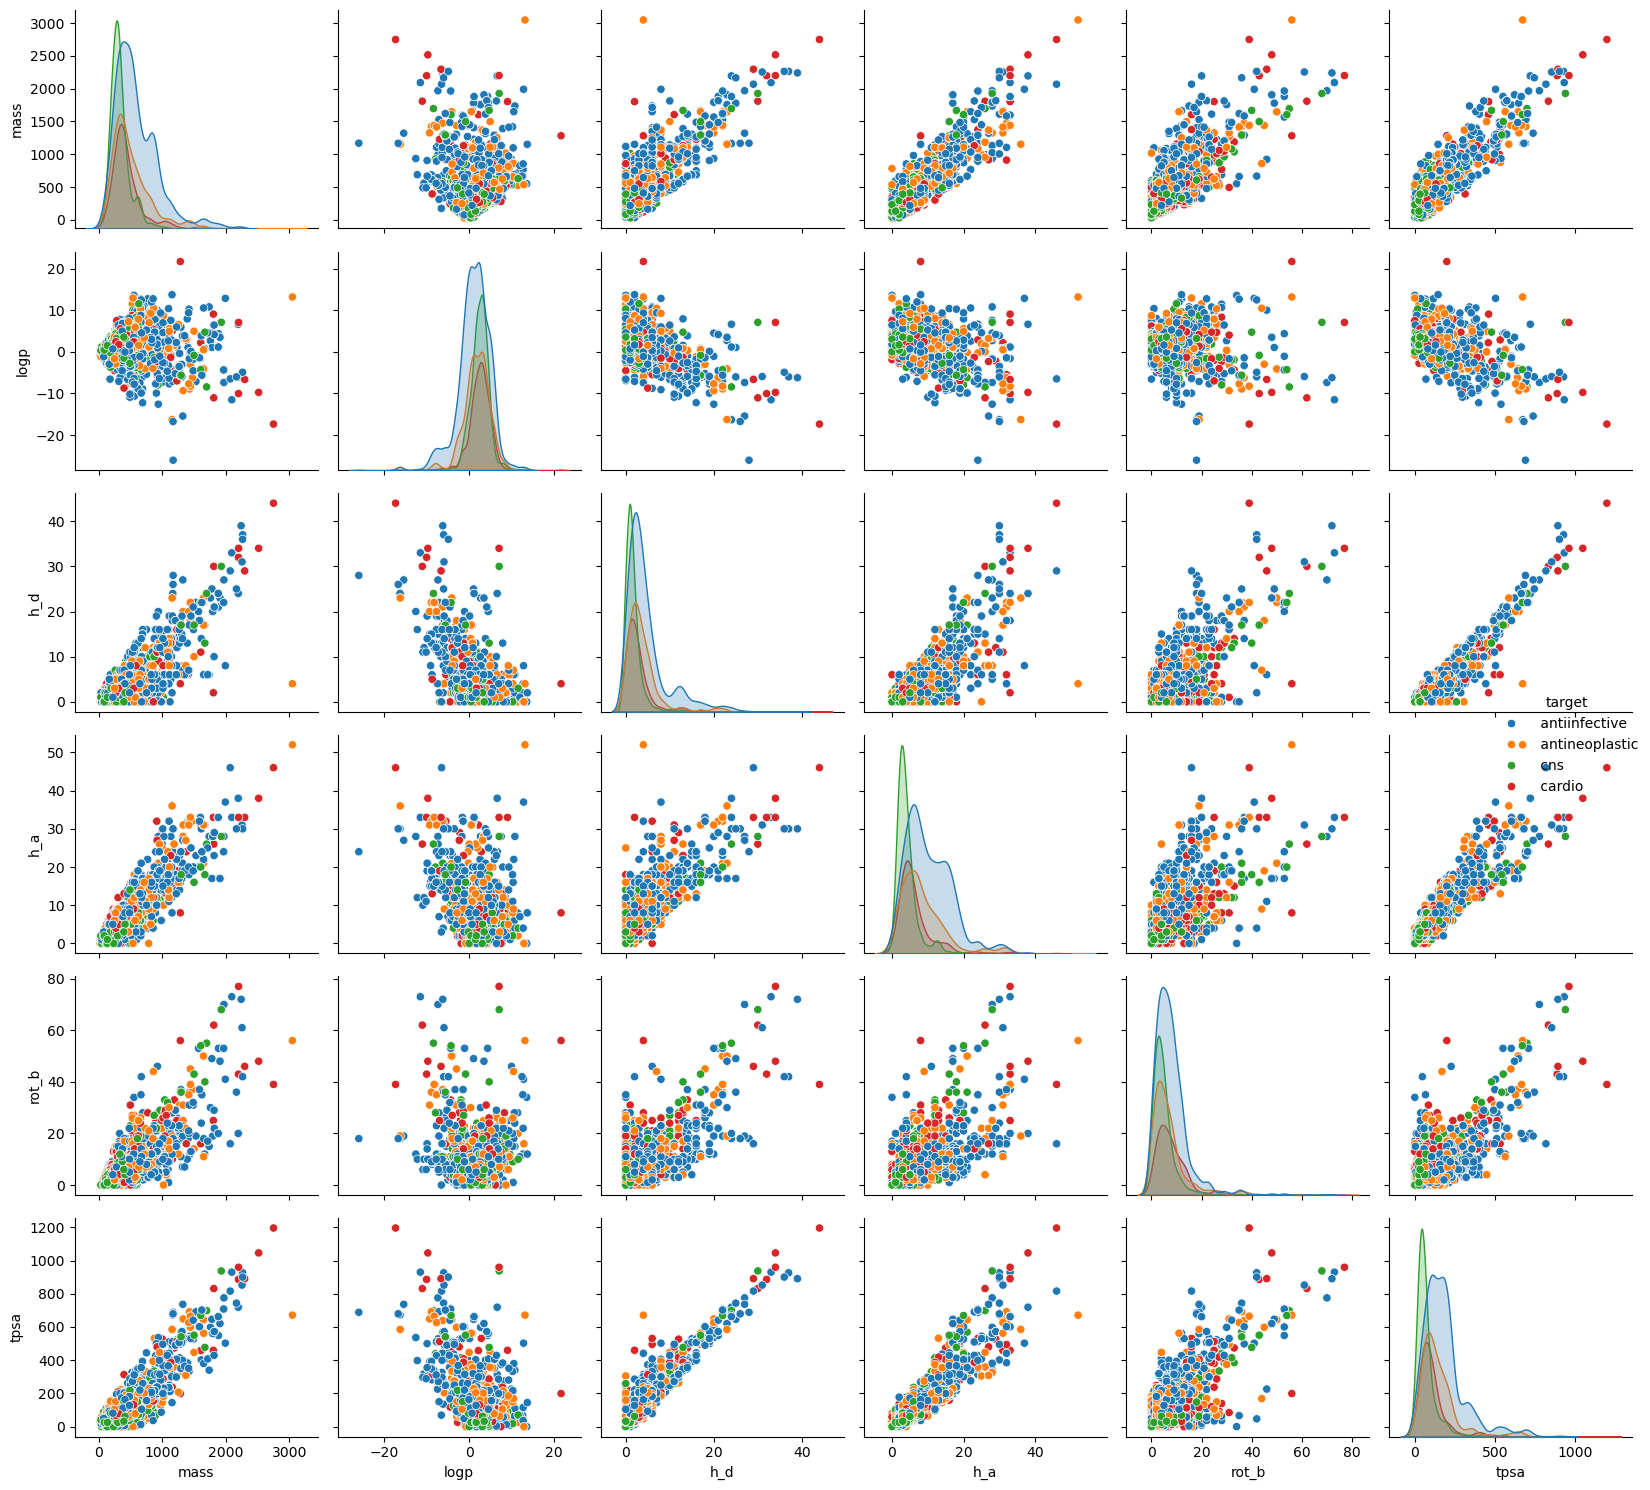

In [6]:
g = sns.pairplot(df, hue="target")
g._legend.set_title("target")
plt.tight_layout()
plt.show()

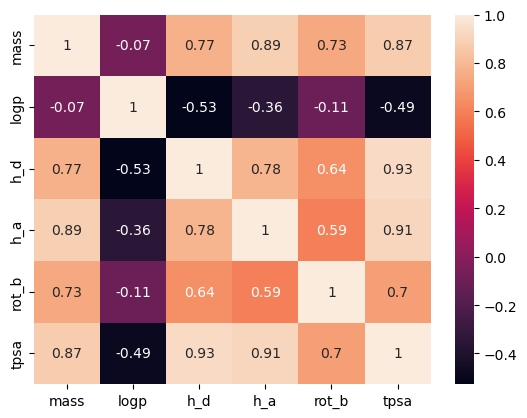

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

X = df.drop(columns="target")
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression(max_iter=1000)
LR_scores = cross_val_score(LR, X_train_scaled, y_train, cv=5)
print(f"Logistic Regression (non-PCA): Mean accuracy = {LR_scores.mean():.2f}, Std = {LR_scores.std():.2f}")

Logistic Regression (non-PCA): Mean accuracy = 0.51, Std = 0.02


In [11]:
LR_pca = LogisticRegression(max_iter=1000)
LR_pca_scores = cross_val_score(LR_pca, X_train_pca, y_train, cv=5)
print(f"Logistic Regression (PCA): Mean accuracy = {LR_pca_scores.mean():.2f}, Std = {LR_pca_scores.std():.2f}")

Logistic Regression (PCA): Mean accuracy = 0.49, Std = 0.01


In [12]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier(random_state=8)
RFclf_scores = cross_val_score(RFclf, X_train_scaled, y_train, cv=5)
print(f"Random Forest (non-PCA): Mean accuracy = {RFclf_scores.mean():.2f}, Std = {RFclf_scores.std():.2f}")

Random Forest (non-PCA): Mean accuracy = 0.76, Std = 0.01


In [13]:
RFclf_pca = RandomForestClassifier(random_state=8)
RFclf_pca_scores = cross_val_score(RFclf_pca, X_train_pca, y_train, cv=5)
print(f"Random Forest (PCA): Mean accuracy = {RFclf_pca_scores.mean():.2f}, Std = {RFclf_pca_scores.std():.2f}")

Random Forest (PCA): Mean accuracy = 0.68, Std = 0.01


In [14]:
from sklearn.svm import SVC

svm = SVC()
scores_svm = cross_val_score(svm, X_train_scaled, y_train, cv=5)
print(f"SVM (non-PCA): Mean accuracy = {scores_svm.mean():.2f}, Std = {scores_svm.std():.2f}")

SVM (non-PCA): Mean accuracy = 0.55, Std = 0.01


In [15]:
svm_pca = SVC()
scores_svm_pca = cross_val_score(svm_pca, X_train_pca, y_train, cv=5)
print(f"SVM (PCA): Mean accuracy = {scores_svm_pca.mean():.2f}, Std = {scores_svm_pca.std():.2f}")

SVM (PCA): Mean accuracy = 0.51, Std = 0.01


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
scores_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(f"KNN (non-PCA): Mean accuracy = {scores_knn.mean():.2f}, Std = {scores_knn.std():.2f}")

KNN (non-PCA): Mean accuracy = 0.67, Std = 0.01


In [17]:
knn_pca = KNeighborsClassifier()
scores_knn_pca = cross_val_score(knn_pca, X_train_pca, y_train, cv=5)
print(f"KNN (PCA): Mean accuracy = {scores_knn_pca.mean():.2f}, Std = {scores_knn_pca.std():.2f}")

KNN (PCA): Mean accuracy = 0.59, Std = 0.01


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=8)
scores_gb = cross_val_score(gb, X_train_scaled, y_train, cv=5)
print(f"Gradient Boosting (non-PCA): Mean accuracy = {scores_gb.mean():.2f}, Std = {scores_gb.std():.2f}")

Gradient Boosting (non-PCA): Mean accuracy = 0.63, Std = 0.01


In [19]:
gb_pca = GradientBoostingClassifier(random_state=8)
scores_gb_pca = cross_val_score(gb_pca, X_train_pca, y_train, cv=5)
print(f"Gradient Boosting (PCA): Mean accuracy = {scores_gb_pca.mean():.2f}, Std = {scores_gb_pca.std():.2f}")

Gradient Boosting (PCA): Mean accuracy = 0.60, Std = 0.02


In [20]:
from sklearn.model_selection import GridSearchCV

models_params = {
    "Logistic Regression": (
        LogisticRegression(max_iter=10000),
        {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l1", "l2"],
            "solver": ["liblinear", "saga"]
        }
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=8),
        {
            "n_estimators": [50, 100],
            "max_depth": [None, 5],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    ),
    "SVM": (
        SVC(),
        {
            "C": [0.1, 1, 10],
            "gamma": ["scale", 0.01],
            "kernel": ["rbf", "linear"]
        }
    ),
    "KNN": (
        KNeighborsClassifier(),
        {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan"]
        }
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=8),
        {
            "n_estimators": [50, 100],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5]
        }
    )
}

for name, (model, params) in models_params.items():
    print(f"\n{name}")
    grid = GridSearchCV(model, params, cv=5, n_jobs=-1, error_score="raise")
    grid.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, grid.predict(X_test_scaled))
    print(f"Accuracy: {acc:.2f}")
    print("Best Parameters:", grid.best_params_)


Logistic Regression
Accuracy: 0.51
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}

Random Forest
Accuracy: 0.79
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

SVM
Accuracy: 0.61
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

KNN
Accuracy: 0.77
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

Gradient Boosting
Accuracy: 0.74
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [21]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(max_iter=1000)
clf2 = RandomForestClassifier(random_state=8)
clf3 = KNeighborsClassifier()
clf4 = GradientBoostingClassifier(random_state=8)
clf5 = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', clf1),
        ('rf', clf2),
        ('knn', clf3),
        ('gb', clf4),
        ('svm', clf5)
    ],
    voting='soft' 
)

scores = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5)
print(f"VotingClassifier mean CV accuracy: {scores.mean():.2f}")

VotingClassifier mean CV accuracy: 0.70


In [22]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train_scaled, y_train)
for name, score in zip(X.columns, selector.scores_):
    print(f"{name}: f-score = {score:.2f}")

mass: f-score = 153.53
logp: f-score = 49.25
h_d: f-score = 116.55
h_a: f-score = 260.17
rot_b: f-score = 40.71
tpsa: f-score = 194.99


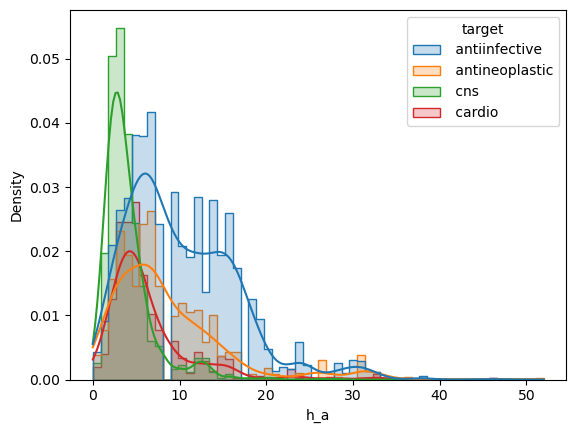

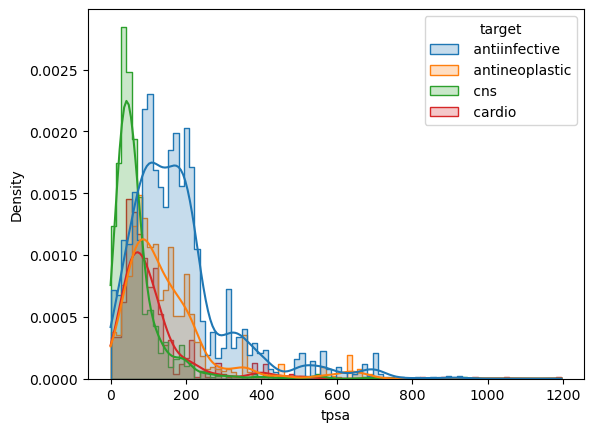

In [23]:
for col in ["h_a", "tpsa"]:
    sns.histplot(data=df, x=col, hue="target", kde=True, element="step", stat="density")
    plt.show()

In [24]:
X = df[["h_a", "tpsa"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=8)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=8),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=8)
}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name}: CV mean accuracy = {cv_scores.mean():.2f}")

Logistic Regression: CV mean accuracy = 0.50
Random Forest: CV mean accuracy = 0.69
SVM: CV mean accuracy = 0.51
KNN: CV mean accuracy = 0.61
Gradient Boosting: CV mean accuracy = 0.58


In [26]:
X = df[["h_a", "tpsa"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=8)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

param_grids = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l2"],
        "solver": ["liblinear"]
    }),
    "Random Forest": (RandomForestClassifier(random_state=8), {
        "n_estimators": [50, 100],
        "max_depth": [None, 3, 5],
        "min_samples_split": [2, 4],
        "min_samples_leaf": [1, 2]
    }),
    "SVM": (SVC(), {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    }),
    "KNN": (KNeighborsClassifier(), {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    }),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=8), {
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 5]
    })
}

for name, (model, params) in param_grids.items():
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train_scaled, y_train)
    print(f"{name}: Best CV accuracy = {grid.best_score_:.2f}")
    print(f"{name}: Best Parameters = {grid.best_params_}\n")

Logistic Regression: Best CV accuracy = 0.51
Logistic Regression: Best Parameters = {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Random Forest: Best CV accuracy = 0.69
Random Forest: Best Parameters = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

SVM: Best CV accuracy = 0.51
SVM: Best Parameters = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

KNN: Best CV accuracy = 0.68
KNN: Best Parameters = {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

Gradient Boosting: Best CV accuracy = 0.65
Gradient Boosting: Best Parameters = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}



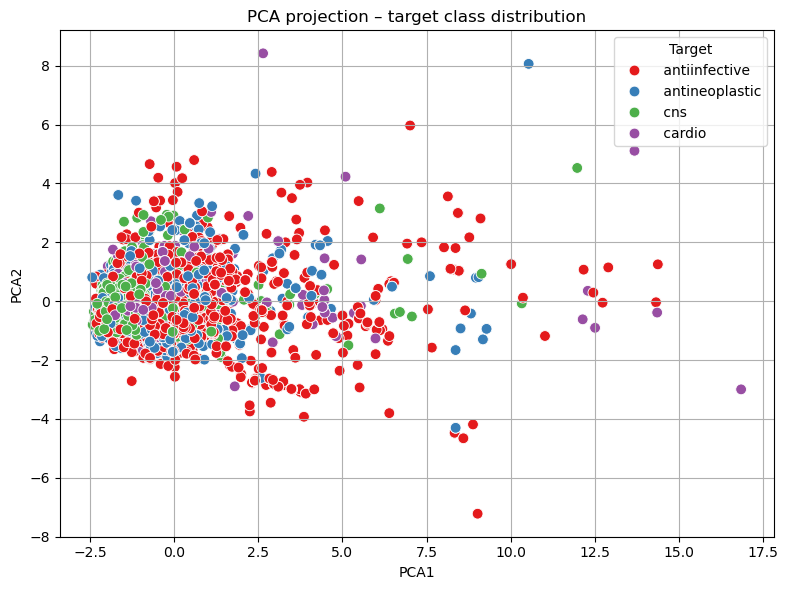

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns="target"))
y = df["target"]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["target"] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="target", palette="Set1", s=60)
plt.title("PCA projection – target class distribution")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Target")
plt.grid(True)
plt.tight_layout()
plt.show()